# Reliability of spike timing

In [1]:
from brian2 import *
prefs.codegen.target = 'numpy'  # switch off code generation
%xmode minimal

Exception reporting mode: Minimal


Leaky integrate-and-fire model with noisy input:

$\frac{dv}{dt} = \left(g_L \left(E_L -v\right) + I_\mathrm{const}\right) \frac{1}{Cm} + \sigma \sqrt{\frac{2}{\tau}}\xi$

In [2]:
start_scope()  # start new simulation

N = 25
Cm = 0.4*nF
g_L = 20*nS
E_L = -70*mV
tau = Cm/g_L
I_const = 0.44*nA
sigma = 0.3*mV
eqs_neurons = '''
dv/dt = (g_L*(E_L - v) + I_const)/ Cm + sigma*sqrt(2/tau)*xi: volt
'''
neurons = NeuronGroup(N, model=eqs_neurons, threshold='v > -50*mV', reset='v = E_L',
                      method='euler')
neurons.v = E_L
voltage = StateMonitor(neurons, 'v', record=True)
spikes = SpikeMonitor(neurons)

run(500*ms)

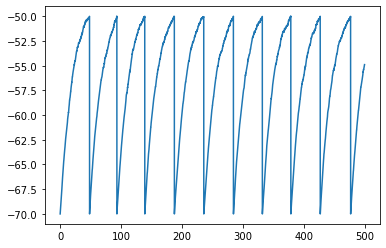

In [3]:
plt.plot(voltage.t/ms, voltage.v[1]/mV)

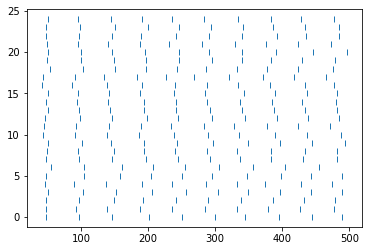

In [4]:
plt.plot(spikes.t/ms, spikes.i, '|')

All but the very first spike times are unrealiable.

In [5]:
start_scope()  # start new simulation

tau_noise = 5*ms
sigma_noise = 0.2*nA
noise_eqs = 'dI_fluct/dt = -I_fluct/tau_noise + sigma_noise*sqrt(2/tau)*xi : amp'
noise = NeuronGroup(1, model=noise_eqs, method='euler')
noise_mon = StateMonitor(noise, 'I_fluct', record=True)

In [6]:
N = 25
Cm = 0.4*nF
g_L = 20*nS
E_L = -70*mV
tau = Cm/g_L
I_const = 0.44*nA
sigma = 0.3*mV
# We add the fluctuating current to the constant current, so the total current
# will fluctuate around the constant value, not changing its mean value
eqs_neurons = '''
dv/dt = (g_L*(E_L - v) + I_const + I_fluct)/ Cm + sigma*sqrt(2/tau)*xi: volt
I_fluct : amp (linked)
'''
neurons = NeuronGroup(N, model=eqs_neurons, threshold='v > -50*mV', reset='v = E_L',
                      method='euler')
neurons.v = E_L
neurons.I_fluct = linked_var(noise, 'I_fluct')
voltage = StateMonitor(neurons, 'v', record=True)
spikes = SpikeMonitor(neurons)

run(500*ms)

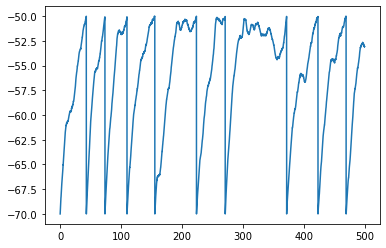

In [7]:
plt.plot(voltage.t/ms, voltage.v[1]/mV)

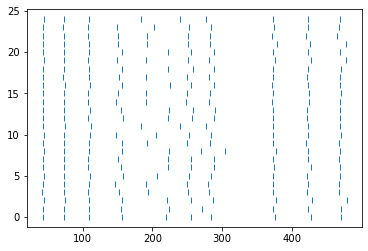

In [8]:
plt.plot(spikes.t/ms, spikes.i, '|')

Spike times are very reliable